# Tuto FFN

- https://pmorissette.github.io/ffn/quick.html


In [102]:
from utils import symbols

import ffn
%matplotlib inline

## Data retrieval


In [103]:
data = ffn.get(','.join(symbols['stocks']['symbols']), start='2019-04-25', end='2022-09-01')
print(data.head())

                mfedpa    pe500pa       enpa      ttepa
Date                                                   
2019-04-25  175.020004  20.000000  27.234940  39.612366
2019-04-26  175.520004  20.061100  27.368362  39.167866
2019-04-29  175.919998  20.077801  27.564585  38.572552
2019-04-30  176.279999  20.024000  27.663557  39.326618
2019-05-02  175.320007  19.874500  27.770779  39.195641


In [104]:
my_portfolio = ffn.get('MFED.PA', provider=ffn.data.csv, path='../data/rsi.stocks.csv')
print(my_portfolio.head())

                mfedpa
Date                  
2019-04-25  175.020004
2019-04-26  175.520004
2019-04-29  175.919998
2019-04-30  176.279999
2019-05-02  175.320007


## Data manipulation

In [105]:
returns = data.to_log_returns().dropna()
print(returns.head())

              mfedpa   pe500pa      enpa     ttepa
Date                                              
2019-04-26  0.002853  0.003050  0.004887 -0.011285
2019-04-29  0.002276  0.000832  0.007144 -0.015316
2019-04-30  0.002044 -0.002683  0.003584  0.019361
2019-05-02 -0.005461 -0.007494  0.003868 -0.003336
2019-05-03  0.002165  0.009320 -0.010149 -0.004262


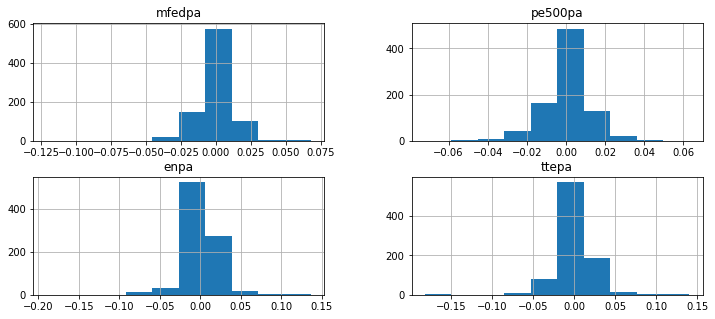

In [106]:
ax = returns.hist(figsize=(12, 5))

In [107]:
returns.corr().as_format('.2f')

,mfedpa,pe500pa,enpa,ttepa
mfedpa,1.00,0.74,0.75,0.70
pe500pa,0.74,1.00,0.52,0.50
enpa,0.75,0.52,1.00,0.63
ttepa,0.70,0.50,0.63,1.00


<module 'matplotlib.pyplot' from '/home/tossan/Documents/coding/python/finance-research/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

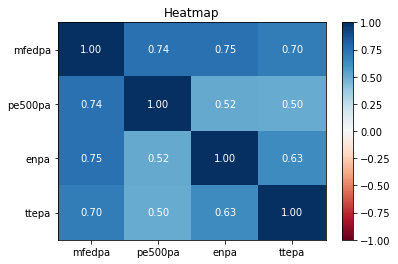

In [108]:
returns.plot_corr_heatmap()

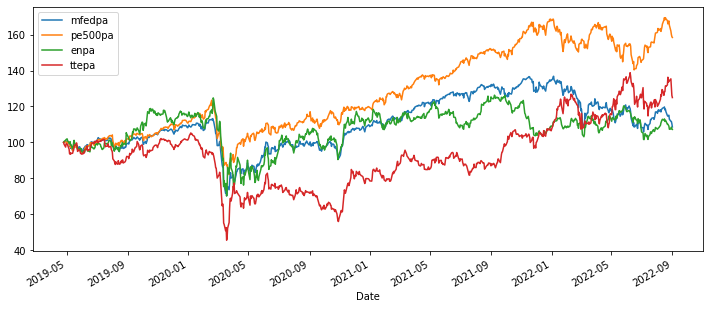

In [109]:
ax = data.rebase().plot(figsize=(12, 5))

## Performance measurement

<AxesSubplot:title={'center':'Equity Progression'}, xlabel='Date'>

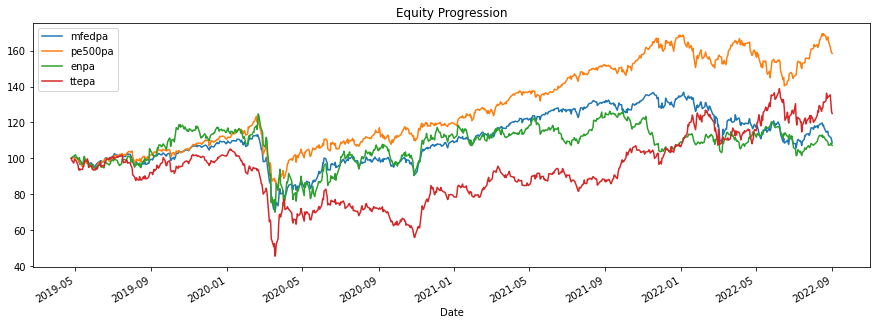

In [110]:
perf = data.calc_stats()
perf.plot()

In [111]:
print(perf.display())

Stat                 mfedpa      pe500pa     enpa        ttepa
-------------------  ----------  ----------  ----------  ----------
Start                2019-04-25  2019-04-25  2019-04-25  2019-04-25
End                  2022-09-01  2022-09-01  2022-09-01  2022-09-01
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         8.62%       58.45%      7.22%       24.96%
Daily Sharpe         0.22        0.79        0.23        0.36
Daily Sortino        0.33        1.22        0.36        0.58
CAGR                 2.49%       14.71%      2.10%       6.87%
Max Drawdown         -38.02%     -33.60%     -43.79%     -56.79%
Calmar Ratio         0.07        0.44        0.05        0.12

MTD                  -1.62%      -0.28%      -0.34%      -0.95%
3m                   -8.10%      3.20%       -8.49%      -5.99%
6m                   -7.65%      2.22%       -1.07%      16.40%
YTD                  -19.18%     -5.60%      -1.79%      17.40%
1Y                   -17.74%     4

In [112]:
perf['pe500pa'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2019   0      0      0      0.12  -5.4    4.05   5.12  -1.6    2.93  -0.48   5.26   0.7   10.68
  2020   2.02  -9.6   -8.71  11.02   2.11   0.86   0.15   7.19  -1.67  -2.37   7.64   1.06   7.92
  2021   1.24   3.35   7      2.53  -1.08   5.66   2.39   3.67  -2.15   6.03   2.4    3.85  40.52
  2022  -5.44  -2.14   6.32  -3.02  -4.07  -5.9   11.29  -1.25  -0.28   0      0      0     -5.6


<AxesSubplot:title={'center':'pe500pa Return Histogram'}, ylabel='Density'>

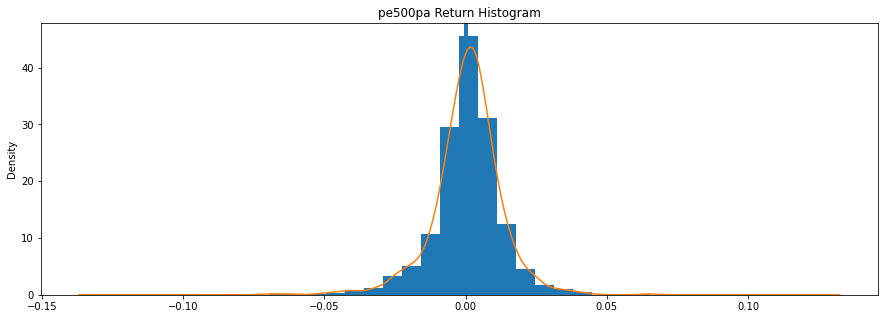

In [113]:
perf['pe500pa'].plot_histogram()

In [114]:
perf['pe500pa'].stats

start                    2019-04-25 00:00:00
end                      2022-09-01 00:00:00
rf                                       0.0
total_return                          0.5845
cagr                                0.147098
max_drawdown                       -0.336006
calmar                              0.437785
mtd                                -0.002801
three_month                         0.032012
six_month                           0.022159
ytd                                -0.056002
one_year                            0.045357
three_year                          0.158568
five_year                                NaN
ten_year                                 NaN
incep                               0.147098
daily_sharpe                         0.79227
daily_sortino                        1.21984
daily_mean                          0.153197
daily_vol                           0.193365
daily_skew                         -0.590683
daily_kurt                          4.390536
best_day  

## Numerical routines and financial functions

In [115]:
returns.calc_mean_var_weights().as_format('.2%')

mfedpa       0.00%
pe500pa    100.00%
enpa         0.00%
ttepa        0.00%
dtype: object

In [116]:
# David Varadi’s Fast Threshold Clustering Algorithm (FTCA)
returns.calc_ftca(threshold=0.8)

{1: ['mfedpa'], 2: ['pe500pa'], 3: ['ttepa'], 4: ['enpa']}